<a href="https://colab.research.google.com/github/Victor0vich/Denis/blob/main/AI_ML_PRO_14Jul2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в машинное обучение

Мы будем работать с датасетом про отток клиентов телекома - в нем содержатся различные характеристики клиентов и информация об оттоке.

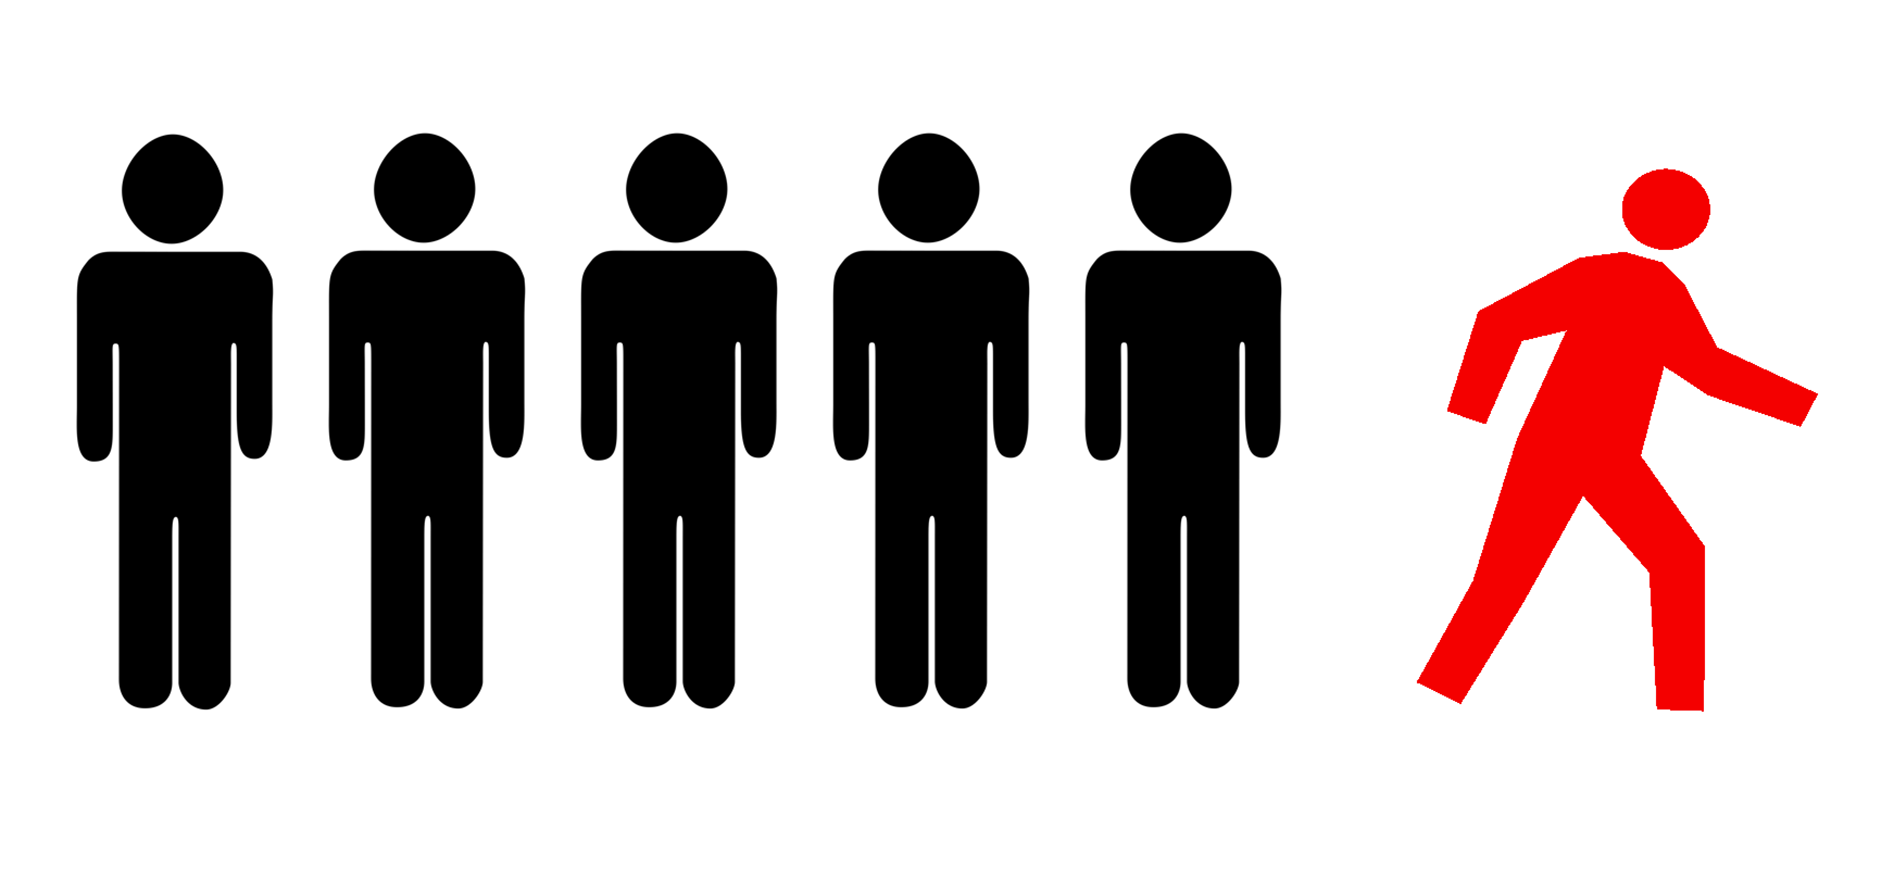

**Цели на сегодня:**

* Изучить данные

* Получить быструю аналитику

* Освоить основы Machine Learning

* Построить модель, оценить ее и проинтерпретировать. Улучшить модель

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

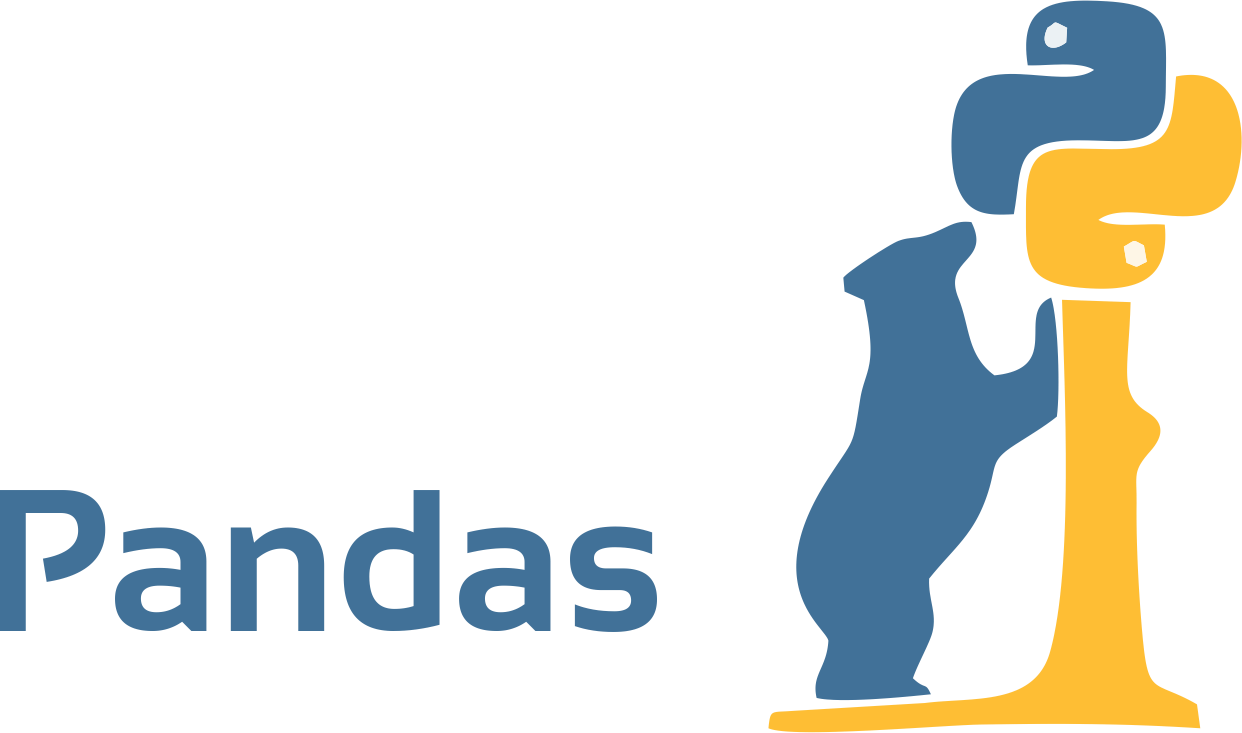

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/CustomerChurn.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.head()

## Описание данных

* `gender` - Whether the customer is a male or a female

* `SeniorCitizen` - Whether the customer is a senior citizen or not (1, 0)

* `Partner` - Whether the customer has a partner or not (Yes, No)

* `Dependents` - Whether the customer has dependents or not (Yes, No)

* `tenure` - Number of months the customer has stayed with the company

* `PhoneService` - Whether the customer has a phone service or not (Yes, No)

* `MultipleLines` - Whether the customer has multiple lines or not (Yes, No, No phone service)

* `InternetService` - Customer’s internet service provider (DSL, Fiber optic, No)

* `OnlineSecurity` - Whether the customer has online security or not (Yes, No, No internet service)

* `OnlineBackup` - Whether the customer has online backup or not (Yes, No, No internet service)

* `DeviceProtection` - Whether the customer has device protection or not (Yes, No, No internet service)

* `TechSupport` - Whether the customer has tech support or not (Yes, No, No internet service)

* `StreamingTV` - Whether the customer has streaming TV or not (Yes, No, No internet service)

* `StreamingMovies` - Whether the customer has streaming movies or not (Yes, No, No internet service)

* `Contract` - The contract term of the customer (Month-to-month, One year, Two year)

* `PaperlessBilling` - Whether the customer has paperless billing or not (Yes, No)

* `PaymentMethod` - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card

* `MonthlyCharges` - The amount charged to the customer monthly

* `TotalCharges` - The total amount charged to the customer

* `Churn` - Whether the customer churned or not (Yes or No)

In [ ]:
df.columns

In [ ]:
df.sample(10)

## Исследование данных

Размер датасета

In [ ]:
df.shape

Информация о типах данных и пропусках

In [ ]:
df.info()

Основные числовые характеристики

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

## Изменение типов признаков

Поработаем с TotalCharges

In [ ]:
df['TotalCharges'].value_counts()

In [ ]:
df[df.TotalCharges == ' ']

Клиенты с пустыми TotalCharges - новые клиенты, по ним еще не закрывали счета. Имеет смысл заменить для этих клиентов TotalCharges на 0.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: 0 if x == ' ' else float(x))

In [ ]:
df.info()

Посмотрим есть ли дубли в данных

In [ ]:
df.duplicated().sum()

# Аналитика

## Дашборды (или аналитика в одну строчку)

## Pandas profiling

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

  Preparing metadata (setup.py) ... done


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df_copy = pd.read_csv(DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [ ]:
profile_report

In [ ]:
profile_report.to_file('ChurnClients_report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Sweetviz

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

# Create an analysis report for your data
report = sv.analyze(df)

# Display the report
report.show_html()

# Введение в машинное обучение

Основные понятия.

В нашем примере мы можем попробовать предсказать отток клиентов (Churn) по их характеристикам.

* Клиенты - *объекты*
* Характеристики клиентов - *признаки*
* Факт оттока / не оттока - *целевая переменная*

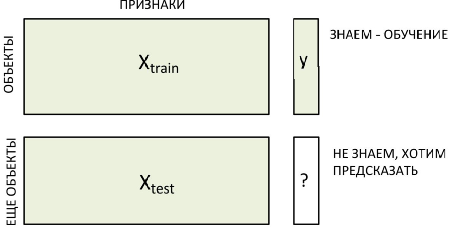

## Модели для прогноза

Модели - это различные математические функции (правила), по которым можно сделать прогноз, то есть предсказать значение целевой переменной.

В этом ноутбуке для прогнозирования будем использовать **решающие деревья**.

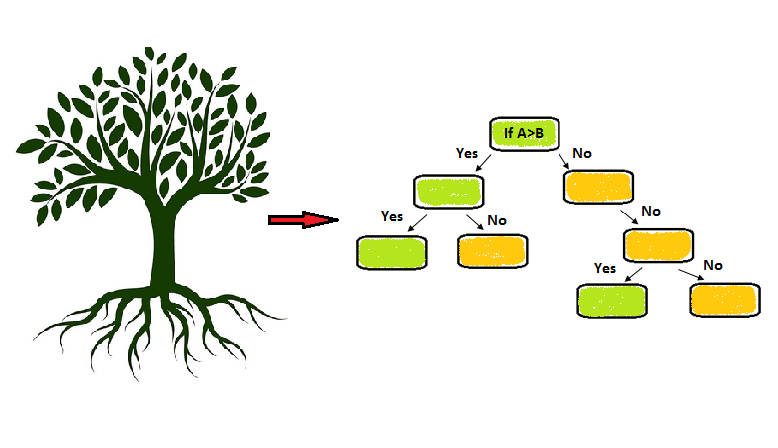

## Подготовка данных

In [ ]:
df = pd.read_csv(DATASET)

df.describe(include='object')

In [ ]:
df['gender'] = df['gender'].map({'Male' : 1, 'Female' : 0})
df['Partner'] = df['Partner'].map({'Yes' : 1, 'No' : 0})
df['Dependents'] = df['Dependents'].map({'Yes' : 1, 'No' : 0})
df['PhoneService'] = df['PhoneService'].map({'Yes' : 1, 'No' : 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes' : 1, 'No' : 0})
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

In [ ]:
df.head()

In [ ]:
df_numeric = df.select_dtypes(include='number')

df_numeric.head()

Сформируем матрицу объект-признак и вектор с целевой переменной.

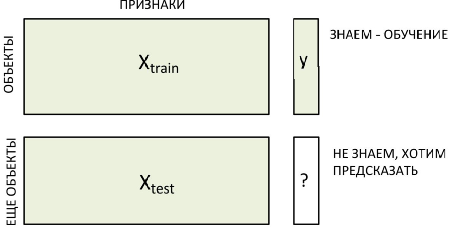

In [ ]:
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

## Обучение и применение модели

Обучение модели

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import graphviz

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

Прогнозирование

In [ ]:
pred = model.predict(X)

pred[:10]

## Валидация модели

Мы не можем оценить насколько хорошо модель делает прогноз на новых для нее данных, поэтому для корректной оценки качества нам необходима *отложенная выборка*.

Разобъем данные на train и test, чтобы:
* на тренировочных данных обучить модель
* на тестовых (отложенная выборка) применить обученную модель и затем проверить качество модели

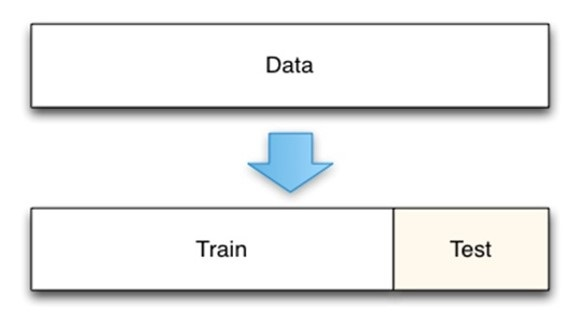

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

## Измерение качества модели

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, pred_train)

In [ ]:
accuracy_score(y_test, pred_test)

## Переобучение

Наша модель работает на тестовых данных гораздо хуже, чем на обучающих, при этом на обучающих - почти идеально. Что же произошло?

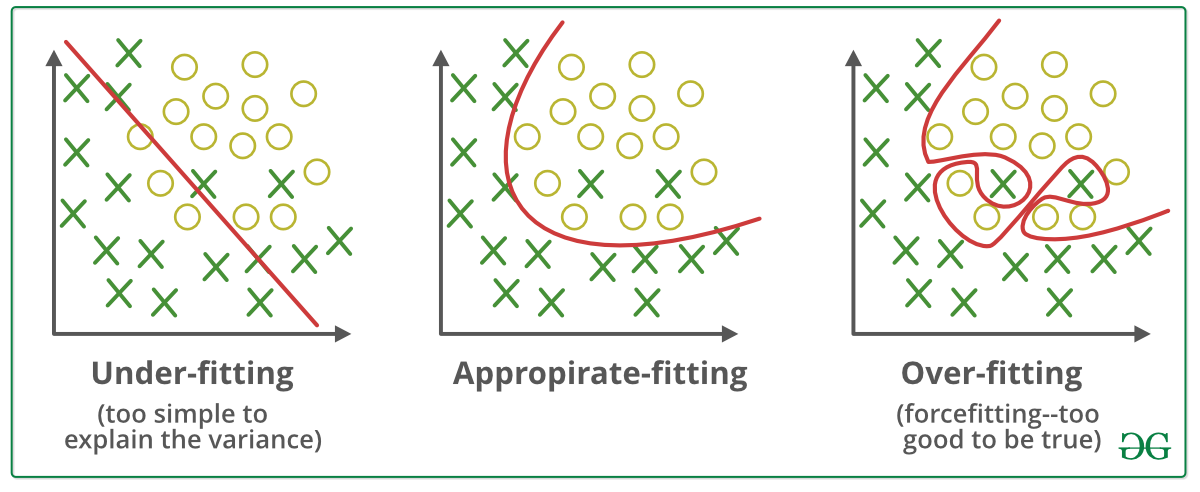

Эта ситуация называется переобучением (overfitting). При переобучении модель не выучивает зависимости в данных, то есть не решает нашу задачу - а просто *запоминает* обучающие данные.

К переобучению склонны сложные модели.

Давайте упростим модель, ограничив глубину дерева.

In [ ]:
model = DecisionTreeClassifier(max_depth = 3)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
accuracy_score(y_train, pred_train)

In [ ]:
accuracy_score(y_test, pred_test)

### Прогноз вероятностей

* Модели классификации почти всегда умеют предсказывать вероятности классов, а не только классы

* Самая известная и надежная метрика, оценивающая качество модели относительно спрогнозированных вероятностей - это ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)[:,1]

roc_auc_score(y_test, probs)

## Визуализация модели (дерева)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(model,
                  feature_names=X.columns,
                  class_names=['Churn', 'Not churn'],
                  filled=True, rounded=True,
                  special_characters=True,
                  out_file=None,
                           )

graph = graphviz.Source(dot_data)
graph

## Улучшение модели

In [ ]:
df['Contract'].value_counts()

In [ ]:
df['Contract'] = df['Contract'].map({'Month-to-month' : 1, 'One year' : 2, 'Two year' : 3})

In [ ]:
X_big = df.select_dtypes(include='number').drop('Churn', axis=1)
y_big = df_numeric['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_big, y_big, test_size=0.25, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth = 6)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

In [ ]:
probs = model.predict_proba(X_test)[:,1]

roc_auc_score(y_test, probs)

In [ ]:
dot_data = tree.export_graphviz(model,
                  feature_names=X_train.columns,
                  class_names=['Churn', 'Not churn'],
                  filled=True, rounded=True,
                  special_characters=True,
                  out_file=None,
                           )

graph = graphviz.Source(dot_data)
graph

## Оценка важности признаков

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(range(len(model.feature_importances_)), model.feature_importances_[indices])
plt.xticks(range(len(model.feature_importances_)), X_train.columns[indices])
plt.show()